### Parte 1: Comprendiendo las Categorías de Productos

**Pregunta de negocio**: ¿Cuáles son las categorías de productos más populares en Amazon UK y cómo se comparan en términos de frecuencia de publicación?

1. **Tablas de Frecuencia**:

    - Genera una tabla de frecuencia para la columna category.
    - ¿Cuáles son las 5 categorías de productos más publicadas?

2. **Visualizaciones**:

    - Muestra la distribución de productos entre las diferentes categorías utilizando un gráfico de barras. Si tienes dificultades para interpretar el gráfico, hazlo solo para un subconjunto de las categorías principales.
    - Para un subconjunto de las categorías principales, visualiza sus proporciones utilizando un gráfico circular. ¿Alguna categoría domina las publicaciones?

#### Importamos los modulos

In [11]:
import pandas as pd
import csv
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##### Importamos el dataframe

In [12]:
df = pd.read_csv(r"C:/Users/Elías/Desktop/Cajon de Sastre/Bootcamp/GitHub/lab-eda-univariate/amz_uk_price_prediction_dataset.csv")

df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [9]:
df.shape

(2443651, 9)

In [15]:
# 1. Tabla de frecuencias'TotRmsAbvGrd'
tabla_frecuencia = df['category'].value_counts()

# Tabla de proporciones de cada valor para 'TotRmsAbvGrd'
tabla_proporciones = df['category'].value_counts(normalize=True)

tabla_frecuencia, tabla_proporciones

(category
 Sports & Outdoors                         836265
 Beauty                                     19312
 Handmade Clothing, Shoes & Accessories     19229
 Bath & Body                                19092
 Birthday Gifts                             18978
                                            ...  
 Motorbike Chassis                            107
 Alexa Built-In Devices                       107
 Plugs                                        107
 Smart Home Security & Lighting               104
 Smart Speakers                                54
 Name: count, Length: 296, dtype: int64,
 category
 Sports & Outdoors                         0.342219
 Beauty                                    0.007903
 Handmade Clothing, Shoes & Accessories    0.007869
 Bath & Body                               0.007813
 Birthday Gifts                            0.007766
                                             ...   
 Motorbike Chassis                         0.000044
 Alexa Built-In Devices  

In [26]:
# 2. Top 5 categorias

tabla_df = tabla_frecuencia.reset_index()
tabla_df.columns = ['category', 'num_productos']
tabla_df.head()



,category,num_productos
0,Sports & Outdoors,836265
1,Beauty,19312
2,"Handmade Clothing, Shoes & Accessories",19229
3,Bath & Body,19092
4,Birthday Gifts,18978


C:\Users\Elías\AppData\Local\Temp\ipykernel_9840\2089179602.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top5, x='category', y='num_productos', palette='viridis')


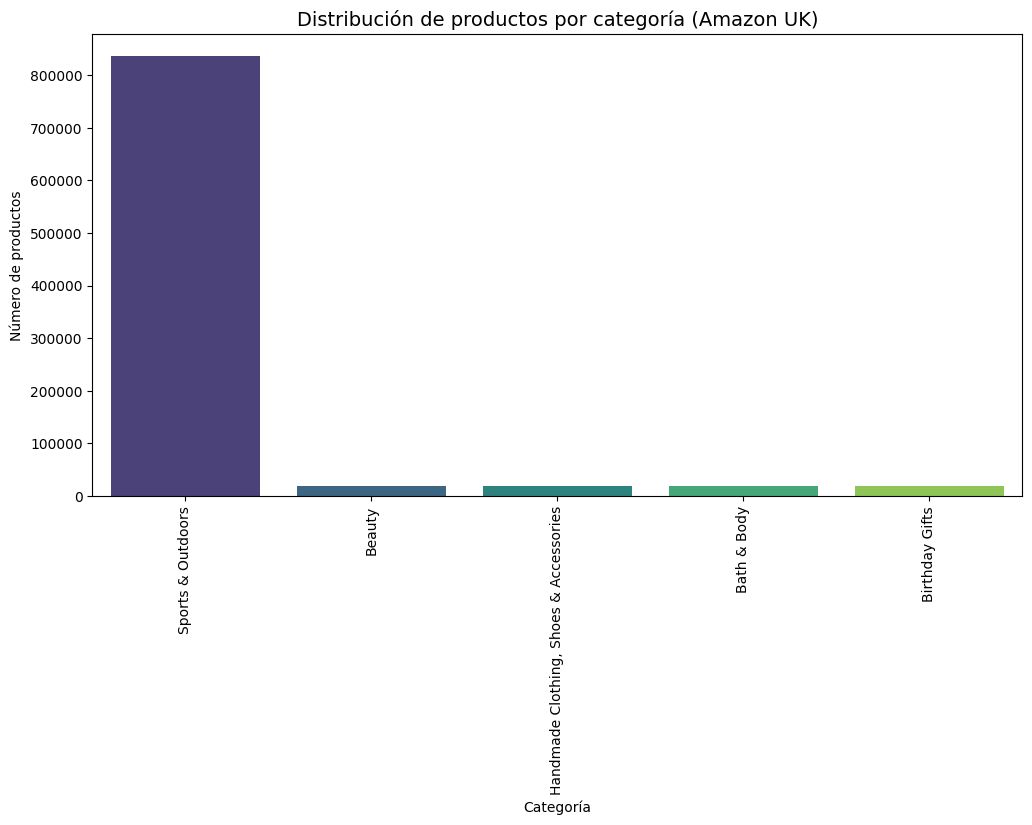

In [29]:
# 3. Distribución de productos entre las diferentes categorías utilizando un gráfico de barras (top 5)

top5 = tabla_df.head(5)

plt.figure(figsize=(12,6))
sns.barplot(data=top5, x='category', y='num_productos', palette='viridis')
plt.title("Distribución de productos por categoría (Amazon UK)", fontsize=14)
plt.xlabel("Categoría")
plt.ylabel("Número de productos")
plt.xticks(rotation=90)
plt.show()

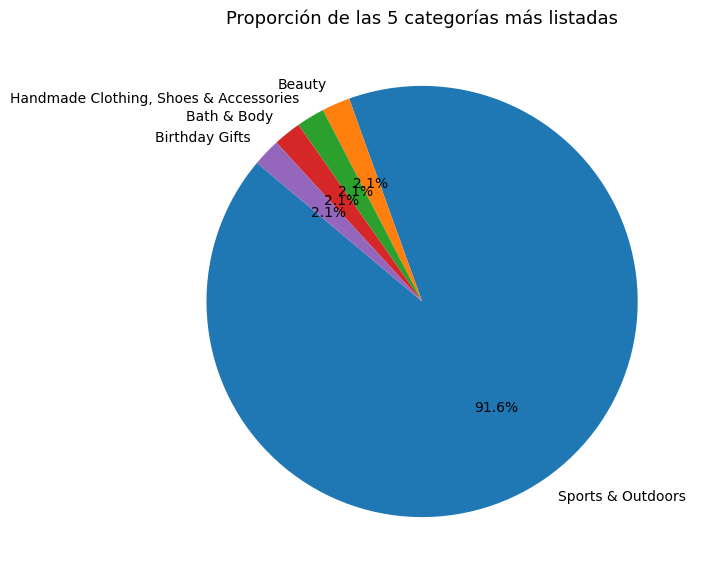

In [30]:
# 4. Visualizar sus proporciones utilizando un gráfico circular

plt.figure(figsize=(7,7))
plt.pie(top5['num_productos'], labels=top5['category'], autopct='%1.1f%%', startangle=140)
plt.title("Proporción de las 5 categorías más listadas", fontsize=13)
plt.show()

La categoría con un dominio absoluto sobre todas las demás de producto vendidos en Amazon Uk es deporte y aire libre (Sports & Outdoors)

### Parte 2: Profundizando en los Precios de los Productos

**Pregunta de negocio:**
¿Cómo se fijan los precios de los productos en Amazon UK, y existen puntos o rangos de precios que sean más comunes?

---

### Medidas de Centralidad

* Calcula la **media**, **mediana** y **moda** del precio de los productos.
* ¿Cuál es el **precio promedio** de los productos listados? ¿Cómo se compara con el **precio más común** (moda)?

---

### Medidas de Dispersión

* Determina la **varianza**, **desviación estándar**, **rango** y **rango intercuartílico (IQR)** del precio de los productos.
* ¿Qué tan variados son los precios? ¿Existen indicios de una dispersión significativa en los precios?

---

### Visualizaciones

* ¿Existe un **rango de precios específico** en el que se concentre la mayoría de los productos?
  Dibuja un **histograma** para visualizar la distribución de los precios.
  Si el gráfico resulta difícil de interpretar, reflexiona por qué ocurre esto y explica cómo podría resolverse.

* ¿Hay productos con precios **significativamente más altos** que el resto?
  Utiliza un **diagrama de cajas (box plot)** para mostrar la dispersión y los posibles *outliers* en los precios de los productos.


In [31]:
df.head(5)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [34]:
# Comprobaciones previas

# Eliminar precios nulos o no numéricos
df = df.dropna(subset=['price'])
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Comprobamos resumen básico
df['price'].describe()


count    2.443651e+06
mean     8.924381e+01
std      3.456089e+02
min      0.000000e+00
25%      9.990000e+00
50%      1.909000e+01
75%      4.599000e+01
max      1.000000e+05
Name: price, dtype: float64

In [35]:
# 1. Moda, media y mediana precio productos

mean_price = df['price'].mean().round(2)
median_price = df['price'].median().round(2)
mode_price = df['price'].mode()[0].round(2)

print(f"media precio: {mean_price}")
print(f"mediana precio: {median_price}")
print(f"moda precio: {mode_price}")

media precio: 89.24
mediana precio: 19.09
moda precio: 9.99


El promedio de precios de los productos listados es 89,24 pounds y es 79, pounds mayor que el precio más común. 

In [52]:
# Determina la varianza, desviación estándar, rango y rango intercuartílico (IQR) del precio de los productos

var_price = df['price'].var().round(2)
desv_price = df['price'].std().round(2)
rango = df['price'].max().round(2) - df['price'].min().round(2)
iqr = df['price'].quantile(0.75).round(2) - df['price'].quantile(0.25).round(2)

print(f"varianza precio: {var_price}")
print(f"desviacion tipica precio: {desv_price}")
print(f"rango precio: {rango}")
print(f"rango intercuartilico (IQR): {iqr}")

varianza precio: 119445.49
desviacion tipica precio: 345.61
rango precio: 100000.0
rango intercuartilico (IQR): 36.0


A priori, parece haber una dispersión de precios bastante alta basandonos en el varlor de la desviación típica. Por otro lado, además, el IQR nos indica que el 50% de los productos tienen un precio que oscila mas/menos 36 pounds unos de otros. 

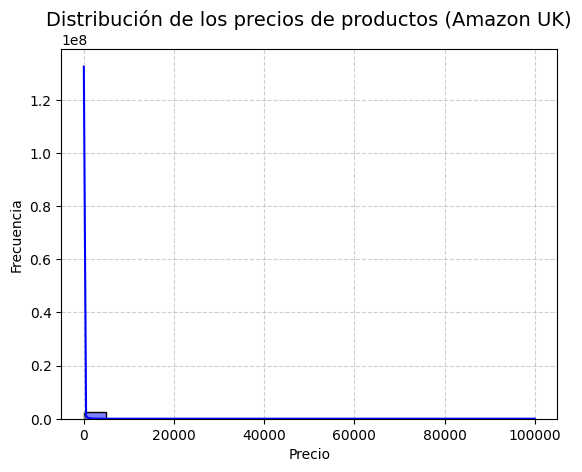

In [55]:
# 2. Dibuja un histograma para visualizar la distribución de los precios

sns.histplot(df['price'], bins=20, kde=True, color='blue')
plt.title("Distribución de los precios de productos (Amazon UK)", fontsize=14)
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


Tenemos pocos productos con un precio muy elevado, de manera que el rando de la grafica hace invisible la distribucion en la zona de precios donde se situan la mayor parte de productos. Habría que limitar el rango de precios a visualizar o emplear una escala logarítmica. 

<Axes: xlabel='price', ylabel='Count'>

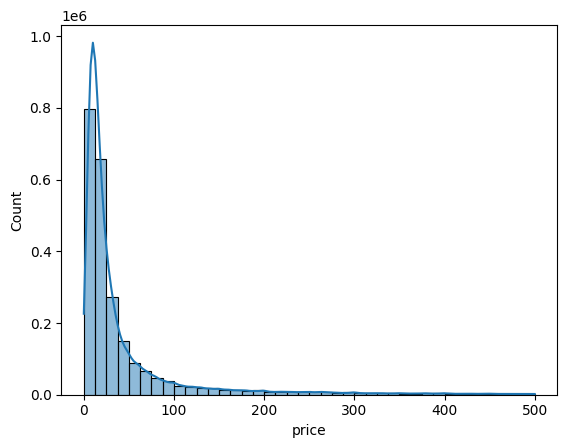

In [57]:
# Opción 1: Limitar rango de precios para enfocarse en los más comunes
sns.histplot(df[df['price'] < 500]['price'], bins=40, kde=True)


c:\Users\Elías\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


<Axes: xlabel='price', ylabel='Count'>

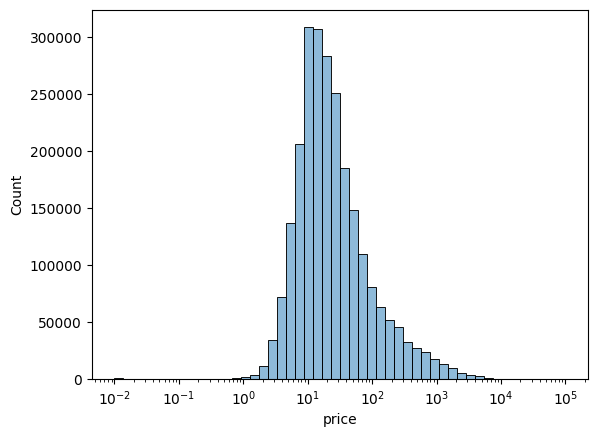

In [58]:
# Opción 2: Escala logarítmica
sns.histplot(df['price'], bins=50, kde=True, log_scale=True)

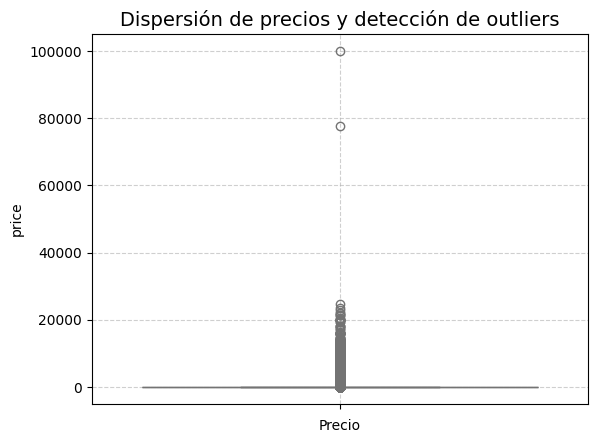

In [61]:
# Boxplot para mostrar la dispersión y los posibles outliers en los precios de los productos

sns.boxplot(data = df['price'], color="lightgreen")

plt.title("Dispersión de precios y detección de outliers", fontsize=14)
plt.xlabel("Precio")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

Tenemos claros outliers en 80.000 y 100.000 pounds. La mayor parte de precios se situa hasta los 20.000 pounds. 